In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Desktop/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.tail(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [4]:

df['GRE Score'].head()

0    337
1    324
2    316
3    322
4    314
Name: GRE Score, dtype: int64

In [5]:
inputs=df[['GRE Score','CGPA']]

In [6]:
inputs.head()

,GRE Score,CGPA
0,337,9.65
1,324,8.87
2,316,8.00
3,322,8.67
4,314,8.21


In [7]:
#print(df['Chance of Admit '].round(0).astype(int))
target=df['Chance of Admit '].apply(lambda x:1 if x>0.7 else 0)
#df['Chance of Admit '].head()

In [8]:
inputs.head()

,GRE Score,CGPA
0,337,9.65
1,324,8.87
2,316,8.00
3,322,8.67
4,314,8.21


In [9]:
target.head()

0    1
1    1
2    1
3    1
4    0
Name: Chance of Admit , dtype: int64

In [10]:
#inputs_n.head(10)

In [11]:
from sklearn.model_selection import train_test_split 

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25,random_state=50)

In [13]:
X_train.head()

,GRE Score,CGPA
203,334,9.87
264,325,8.76
338,323,8.74
261,312,8.09
216,322,9.26


In [14]:
y_train.head()

203    1
264    1
338    1
261    1
216    1
Name: Chance of Admit , dtype: int64

In [21]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
pred=model.predict([[0,0.00]])
pred

array([0], dtype=int64)

In [26]:
y_test

146    1
332    1
67     0
362    1
102    0
      ..
393    1
50     1
24     1
389    1
255    1
Name: Chance of Admit , Length: 100, dtype: int64

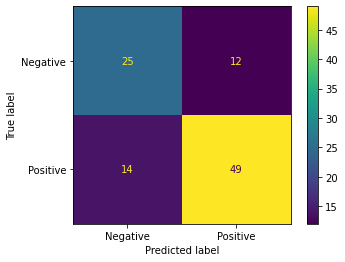

In [27]:
from sklearn import metrics
cm=metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=['Negative', 'Positive'])


In [28]:
y_test.shape

(100,)

In [29]:
y_train.shape

(300,)

In [30]:
X_test.shape

(100, 2)

In [31]:
accuracy=metrics.accuracy_score(y_test,pred)

In [32]:
accuracy

0.74

In [33]:
precision=metrics.precision_score(y_test,pred)
print('Precision: %.3f' % precision)

Precision: 0.803


In [34]:
recall=metrics.recall_score(y_test,pred)
print('Recall: %.3f' % recall)

Recall: 0.778


In [35]:
f_measure=metrics.f1_score(y_test,pred)
print(':F_measure %.3f' % f_measure)

:F_measure 0.790
